In [20]:
 import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns


In [21]:
!unzip /content/drive/MyDrive/minor2/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: datset/T/Normal/Normal-1389.png  
  inflating: datset/T/Normal/Normal-1390.png  
  inflating: datset/T/Normal/Normal-1391.png  
  inflating: datset/T/Normal/Normal-1392.png  
  inflating: datset/T/Normal/Normal-1393.png  
  inflating: datset/T/Normal/Normal-1394.png  
  inflating: datset/T/Normal/Normal-1395.png  
  inflating: datset/T/Normal/Normal-1396.png  
  inflating: datset/T/Normal/Normal-1397.png  
  inflating: datset/T/Normal/Normal-1398.png  
  inflating: datset/T/Normal/Normal-1399.png  
  inflating: datset/T/Normal/Normal-1400.png  
  inflating: datset/T/Normal/Normal-1401.png  
  inflating: datset/T/Normal/Normal-1402.png  
  inflating: datset/T/Normal/Normal-1403.png  
  inflating: datset/T/Normal/Normal-1404.png  
  inflating: datset/T/Normal/Normal-1405.png  
  inflating: datset/T/Normal/Normal-1406.png  
  inflating: datset/T/Normal/Normal-1407.png  
  inflating: datset/T/Normal/Normal-1408.png  
  inflati

In [22]:
train_path="datset/T"
val_path="datset/V"

In [4]:
!pip install q keras==2.4.3

In [ ]:
#no of classes

In [5]:
for directory_path in glob.glob("datset/T/*"):
    label = directory_path.split("\\")[-1]
    print(label)

datset/T/Normal
datset/T/pneumonia
datset/T/covid+


**Visualising covid+ve image**

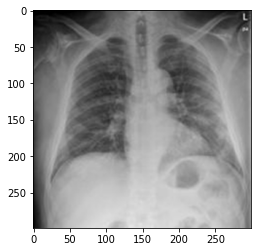

In [47]:
import glob
import cv2
import matplotlib.pyplot as plt
file="datset/V/covid+/COVID-520.png"
image= cv2.imread(file)
plt.imshow(image)


**visualising Covid-ve**

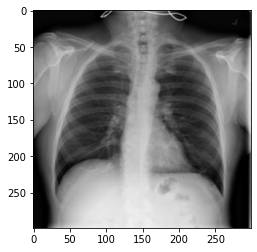

In [48]:
file="datset/V/Normal/Normal-19.png"
image= cv2.imread(file)
plt.imshow(image)

In [34]:
import os

list = os.listdir('datset/T/covid+') # dir is your directory path
TP= len(list)
print (TP)

3076


In [35]:
list = os.listdir('datset/T/Normal') # dir is your directory path
TN= len(list)
print (TN)

2964


In [36]:
trainingdata=TP+TN;

Data balance


In [37]:
list = os.listdir('datset/V/covid+') # dir is your directory path
TestP= len(list)
print (TestP)
list = os.listdir('datset/V/Normal') # dir is your directory path
TestN= len(list)
print (TestN)
testdata=TestP+TestN;


540
540


training vs testing(80:20)

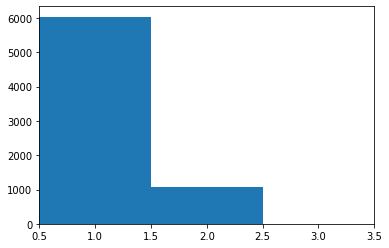

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure()
s = fig.add_subplot(111)
s.bar([1, 2], [trainingdata,testdata], width=1)
s.set_xlim(0.5, 3.5)
fig.savefig('t.png')

In [ ]:
#Importing Densenet201

In [23]:
from keras.applications.densenet import DenseNet201 
from keras.applications.densenet  import preprocess_input

In [24]:

IMAGE_SIZE = [224, 224]
densenet= DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [25]:
densenet.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [ ]:
#Fine tuning Densenet201

In [26]:
for layer in densenet.layers:
  layer.trainable = False

In [27]:

x = Flatten()(densenet.output)
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=densenet.input, outputs=prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [28]:
from keras import optimizers


adam = optimizers.Adam(0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [29]:

# Image Data Augmentation
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [30]:

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [31]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 7253 images belonging to 3 classes.


In [32]:
test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1212 images belonging to 3 classes.


In [33]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='xception.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  validation_steps=2,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
227/227 - 189s - loss: 0.2662 - accuracy: 0.8372 - val_loss: 0.1712 - val_accuracy: 0.9062

Epoch 00001: val_loss improved from inf to 0.17120, saving model to xception.h5
Epoch 2/10
227/227 - 98s - loss: 0.1866 - accuracy: 0.8897 - val_loss: 0.1615 - val_accuracy: 0.9219

Epoch 00002: val_loss improved from 0.17120 to 0.16149, saving model to xception.h5
Epoch 3/10
227/227 - 99s - loss: 0.1675 - accuracy: 0.9071 - val_loss: 0.2089 - val_accuracy: 0.8906

Epoch 00003: val_loss did not improve from 0.16149
Epoch 4/10
227/227 - 99s - loss: 0.1533 - accuracy: 0.9156 - val_loss: 0.0992 - val_accuracy: 0.9375

Epoch 00004: val_loss improved from 0.16149 to 0.09924, saving model to xception.h5
Epoch 5/10
227/227 - 97s - loss: 0.1447 - accuracy: 0.9184 - val_loss: 0.1597 - val_accuracy: 0.9375

Epoch 00005: val_loss did not improve from 0.09924
Epoch 6/10
227/227 - 99s - loss: 0.1424 - accuracy: 0.9199 - val_loss: 0.1634 - val_accuracy: 0.9531

Epoch 00006: val_loss did not improve

In [ ]:
#graph of accuracy

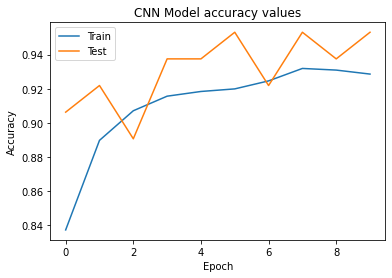

In [49]:

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#confusion matrix

In [55]:
import matplotlib.pyplot as plt
import itertools 

#by https://sites.google.com/view/amarnath-r/keras-deep-learning-image-classification-a-simple-example

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(5,5))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [56]:
classes=["COVID",  "Normal","pneumonia"]

In [53]:
Densenetmodel=model

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix 
Normalized confusion matrix
Confusion matrix, without normalization


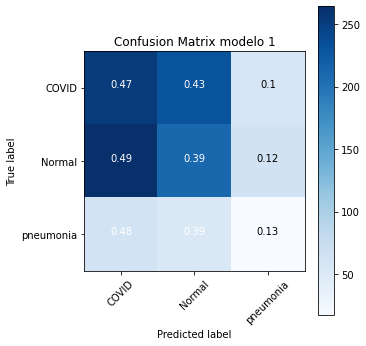

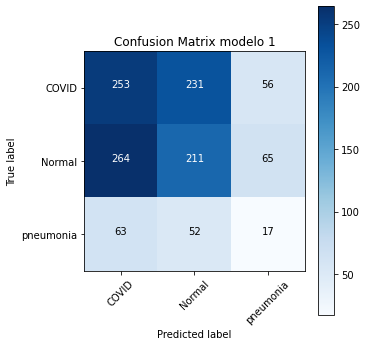

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred =  Densenetmodel.predict_generator(test_set)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix ')

cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, classes, title='Confusion Matrix modelo 1')
plot_confusion_matrix(cm, classes,False, title='Confusion Matrix modelo 1')